In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
customers_df = pd.read_csv( "customers.csv" )

In [3]:
customers_df.head(5) 

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

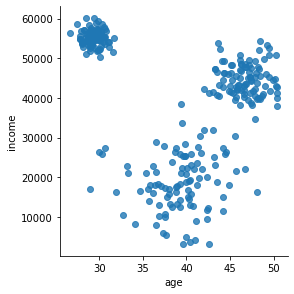

In [5]:
sn.lmplot( "age", "income", data=customers_df, fit_reg = False, size = 4 ); 
#plt.title( "Fig 1: Customer Segments Based on Income and Age");

In [6]:
from sklearn.cluster import KMeans 
clusters = KMeans(3) 
clusters.fit(customers_df) 

KMeans(n_clusters=3)

In [7]:
customers_df["clusterid"] = clusters.labels_ 

In [8]:
customers_df[0:5] 

,income,age,clusterid
0,41100.0,48.75,2
1,54100.0,28.10,0
2,47800.0,46.75,2
3,19100.0,40.25,1
4,18200.0,35.80,1


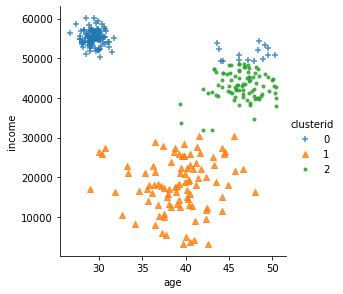

In [9]:
markers = ['+','^','.'] 
sn.lmplot( "age", "income", 
data=customers_df, 
hue = "clusterid", 
fit_reg=False, 
markers = markers, 
size = 4 );

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler() 
scaled_customers_df = scaler.fit_transform( 
 customers_df[["age", "income"]] ) 
scaled_customers_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

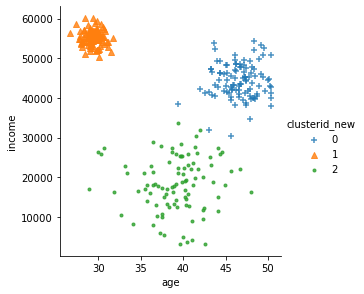

In [12]:
from sklearn.cluster import KMeans 
clusters_new = KMeans( 3, random_state=42 ) 
clusters_new.fit( scaled_customers_df ) 
customers_df["clusterid_new"] = clusters_new.labels_ 
markers = ['+','^','.'] 
sn.lmplot( "age", "income", 
data=customers_df, 
hue = "clusterid_new", 
fit_reg=False, 
markers = markers, 
size = 4 ); 
#plt.title( "Fig 3: Customer segments created after normalization");

In [13]:
clusters.cluster_centers_ 

array([[5.46756522e+04, 3.17004348e+01],
       [1.81447917e+04, 3.91744792e+01],
       [4.30539326e+04, 4.64191011e+01]])

In [14]:
customers_df.groupby( 'clusterid' )['age', 
'income'].agg( ["mean", 
'std'] ).reset_index() 

clusterid        age                  income             
                  mean       std          mean          std
0         0  31.700435  6.122122  54675.652174  2362.224320
1         1  39.174479  3.626068  18144.791667  6745.241906
2         2  46.419101  2.289620  43053.932584  3613.769632